# Part II: Predicting Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. Ideally, you should be able to start working on your term project after finishing this.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [ ]:
#If opening in colab run this cell
!git clone https://github.com/RubingLi123/foster_2023spring.git
%cd foster_2023spring/Homeworks

fatal: destination path 'foster_2023spring' already exists and is not an empty directory.
/content/foster_2023spring/Homeworks


In [ ]:
import pandas as pd

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv" 


### Loading the data

** 1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and show the first few rows in the dataset. ** 

In [ ]:
# Put your answer here
patient_data = pd.read_csv(data_path)
print("Total number of rows in the dataset: " + str(len(patient_data.index)))

Total number of rows in the dataset: 110527


In [ ]:
patient_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female. 
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor. 
7. Age = How old is the patient. 
8. Neighborhood - Place where the patient lives. 
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

** 2. Check out if there are any Na or NaN values. Drop all the observations that include such values in any of the columns. ** 

In [ ]:
# Put your answer here
patient_data = patient_data.dropna().reset_index(drop=True)
# Will show the count of Nas in each column of the dataframe
patient_data.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

Can see that no column in the data set has any values which are Na or NaN.

### Dealing with dates

** 3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). **

In [ ]:
# Put your answer here
patient_data['AppointmentDay'] = pd.to_datetime(patient_data['AppointmentDay']);
patient_data['ScheduledDay'] = pd.to_datetime(patient_data['ScheduledDay'])
patient_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


** 4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, "normalize" ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method. **

In [ ]:
# Put your answer here

patient_data['ScheduledDay']=patient_data['ScheduledDay'].dt.normalize()
patient_data.head(20)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


** 5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field includes only integers (and not TimeDelta, which is the difference between two datetimes).**

In [ ]:
# Put your answer here
patient_data['TimeInAdvance'] = abs(patient_data['ScheduledDay'].dt.day - patient_data['AppointmentDay'].dt.day)
patient_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,4
110523,3.596270e+12,5650093,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,4
110524,1.557660e+13,5630692,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,20
110525,9.213490e+13,5630323,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,20


There are many other features you may want to extract from date variables, such as the time at which the appointment was schedule, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data (in case you forgot about it, take a look at the 'Dealing with data' notebook in Module 1). Do you see any weird values in any of the columns? Remove all observations that include "weird" or otherwise questionable values and comment on why did you remove such observations. Also, print the number of observations you removed. **

In [ ]:
# Put your answer here
patient_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,6.532965
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,8.191048
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,30.000000


We can observe from the above table, there the minimum value for age = -1 which is impractical and not possible. We need to therefore eliminate all the rows which have -1 as its value under the Age column.

In [ ]:
patient_data[patient_data['Age']==-1]
# There is only one row that has Age as -1. We need to remvoe this one row. 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
99832,4.659430e+14,5775010,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0


In [ ]:
patient_data = patient_data[patient_data['Age']!=-1]
patient_data[patient_data['Age']==-1]
# As shown in the table below, I have removed the required row. 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance


### Dealing with binary variables

** 7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.  **

In [ ]:
# Put your answer here
import numpy as np
patient_data['IsFemale'] = np.where(patient_data['Gender']=='F', 1, 0)
patient_data.head(5)

<ipython-input-12-2a89395749b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_data['IsFemale'] = np.where(patient_data['Gender']=='F', 1, 0)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1


** 8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise. **

In [ ]:
# Put your answer here
patient_data['No-Show Variable'] = np.where(patient_data['No-show']=='No', 1, 0)
patient_data.head(10)

<ipython-input-13-f984216ade48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_data['No-Show Variable'] = np.where(patient_data['No-show']=='No', 1, 0)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,No-Show Variable
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1,1
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,1
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1,1
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1,1
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1,1
5,9.598510e+13,5626772,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,2,1,1
6,7.336880e+14,5630279,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,1,0
7,3.449830e+12,5630575,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,1,0
8,5.639470e+13,5638447,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,0,1,1
9,7.812460e+13,5629123,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,2,1,1


In [ ]:
patient_data.drop('Gender',axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Dealing with categorical variables

** 9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?  ** 

In [ ]:
# Put your answer here
max_freq_count = patient_data['Neighborhood'].value_counts().head(5).rename_axis('Neighborhood').reset_index(name='counts')
max_freq_count

,Neighborhood,counts
0,JARDIM CAMBURI,7717
1,MARIA ORTIZ,5805
2,RESISTÊNCIA,4431
3,JARDIM DA PENHA,3877
4,ITARARÉ,3514


In [ ]:
lowest_freq_count = patient_data['Neighborhood'].value_counts().tail(5).rename_axis('Neighborhood').reset_index(name='counts')
lowest_freq_count

,Neighborhood,counts
0,ILHA DO BOI,35
1,ILHA DO FRADE,10
2,AEROPORTO,8
3,ILHAS OCEÂNICAS DE TRINDADE,2
4,PARQUE INDUSTRIAL,1


As you can see from the outputs above, the five most common neighborhood occurrences are:

JARDIM CAMBURI     
MARIA ORTIZ        
RESISTÊNCIA        
JARDIM DA PENHA    
ITARARÉ   

and the five least common neighborhood occurrences are:

ILHA DO BOI                    
ILHA DO FRADE                  
AEROPORTO                       
ILHAS OCEÂNICAS DE TRINDADE     
PARQUE INDUSTRIAL               





** 10. (Optional) We often group together categories that are very rare because it's hard to genearlize from them. Find the neighborhoods that appear less than 500 times in the dataset and replace their name with "OTHER". **

In [ ]:
# Put your (optional) answer here
value_count = patient_data['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='counts')
value_count

,Neighborhood,counts
0,JARDIM CAMBURI,7717
1,MARIA ORTIZ,5805
2,RESISTÊNCIA,4431
3,JARDIM DA PENHA,3877
4,ITARARÉ,3514
...,...,...
76,ILHA DO BOI,35
77,ILHA DO FRADE,10
78,AEROPORTO,8
79,ILHAS OCEÂNICAS DE TRINDADE,2


In [ ]:
dummies = pd.get_dummies(patient_data['Neighborhood'])
dummies

,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


** 11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. Make sure to also drop the Neighborhood column. **

In [ ]:
# Put your answer here
dummies = pd.get_dummies(patient_data['Neighborhood'])
new_dataframe = patient_data.join(dummies)

new_dataframe.drop('Neighborhood', inplace=True, axis=1)
new_dataframe


,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dealing with panel data

** 12. Let's take a look at the PatientId column. How many patients have made more than one appointment?  **

In [ ]:
# Put your answer here
patient_count = patient_data['PatientId'].value_counts().rename_axis('Patient').reset_index(name='counts')
count = len(patient_count[patient_count['counts']>1])
print("The number of patients having more than one appointment = " + str(count));

The number of patients having more than one appointment = 24495


As you can see, there are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions. For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. That being said, taking advantage of panel data often requires additional data processing. The following exercise is **optional** and relatively advanced, so feel free to ignore it. 

** 13. (Optional) Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). Hint: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable. All of these things can be done using pandas. **

In [ ]:
# Put your (optional) answer here

There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**14. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay. **

In [ ]:
# Put your answer here
new_dataframe.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], inplace = True, axis=1);
new_dataframe

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,62,0,1,0,0,0,0,No,0,1,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,No,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,No,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,No,0,1,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,No,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,No,4,1,...,0,0,0,0,0,0,0,0,0,0
110523,51,0,0,0,0,0,1,No,4,1,...,0,0,0,0,0,0,0,0,0,0
110524,21,0,0,0,0,0,1,No,20,1,...,0,0,0,0,0,0,0,0,0,0
110525,38,0,0,0,0,0,1,No,20,1,...,0,0,0,0,0,0,0,0,0,0


### Predictive modeling

** 15. Let's build a model to predict if someone will not show up using a DecisionTreeClassifier. Report the training accuracy and the cross-validated accuracy using 5 folds. **

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Put your answer here
# Dropping the No-show redundant attribute which was not removed initially at the time of the creation of the No-Show Variable
new_dataframe.drop('No-show', axis=1, inplace = True)
X = new_dataframe.drop('No-Show Variable', axis=1)
y = new_dataframe[['No-Show Variable']]


In [ ]:
# Split dataset into training set and test set
np.random.seed(43)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
# Building a decision tree
clf = DecisionTreeClassifier(max_depth=3)
# Training with training data
clf = clf.fit(X_train, y_train)
# Predicting the output
y_pred = clf.predict(X_test)



In [ ]:
# Calculated Accuracy scores
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7987514325351348


In [ ]:
# Calculating cross-validation scores
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv=10)
print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std()))

Cross Validated Accuracy: 0.798 +/- 0.000


** 16. As discussed in class, one way to control the complexity of a decision tree is by enforcing that at least some minimum number of examples from the training set populate each leaf. This is set with the min_samples_leaf parameter. Try values for min_samples_leaf ranging from 1 to 4096 by doubling the number of samples (i.e., 1, 2, 4, 8, ..., 4096). For each value, compute the training accuracy and the cross-validated accuracy. Use the results to plot fitting curves and explain what they show. What do you think is the most appropriate value for min_samples_leaf for this problem? ** 

In [ ]:
# Put your answer here

acc_scores = []
cross_val_scores = [];

minLeafs = [2**i for i in range(0,13)]

for ml in minLeafs:
  clf = DecisionTreeClassifier(min_samples_leaf = ml);
  clf = clf.fit(X_train, y_train);
  y_pred = clf.predict(X_test);

  acc_scores.append(metrics.accuracy_score(y_test, y_pred))
  cross_val_scores.append(cross_val_score(clf, X, y, scoring='accuracy', cv=10).mean())


print(acc_scores);
print(cross_val_scores);

[0.7283611798057784, 0.7143977320706918, 0.7400325713251704, 0.761234091320345, 0.7811086314011702, 0.7899149526509439, 0.7970022317389469, 0.798057783943543, 0.7987514325351348, 0.7987514325351348, 0.7987514325351348, 0.7987514325351348, 0.7987514325351348]
[0.7156327249495317, 0.7026674704142404, 0.7300547367618638, 0.7529452366495666, 0.7731033664370849, 0.7848109005866152, 0.7922118395822528, 0.7940394722051051, 0.7965818519128659, 0.7980656136152338, 0.7980656136152338, 0.7980656136152338, 0.7980656136152338]


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
scores = pd.DataFrame(minLeafs,columns=['Min_Samples_Leaf'])
scores['Accuracy_Scores'] = acc_scores
scores['Cross_Validation_Scores'] = cross_val_scores
scores

,Min_Samples_Leaf,Accuracy_Scores,Cross_Validation_Scores
0,1,0.728361,0.715633
1,2,0.714398,0.702667
2,4,0.740033,0.730055
3,8,0.761234,0.752945
4,16,0.781109,0.773103
5,32,0.789915,0.784811
6,64,0.797002,0.792212
7,128,0.798058,0.794039
8,256,0.798751,0.796582
9,512,0.798751,0.798066


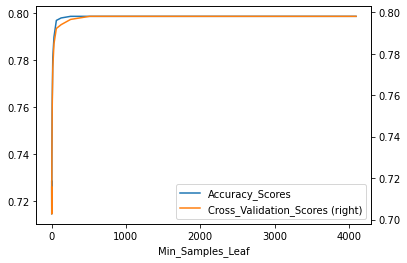

In [ ]:
ax = scores.plot('Min_Samples_Leaf','Accuracy_Scores')
scores.plot('Min_Samples_Leaf','Cross_Validation_Scores',secondary_y=True, ax=ax)
plt.show()

I think the most appropriate value for Min_samples_leaf would be 512. This is because for this value we get the highest accuracy and the least complexity. As the complexity increases there is barely any significant increase in the accuracy scores.

** 17. (Optional) Do you think the accuracy of the model you built is good or not? Why? What other addititonal information would be useful to evaluate whether the model is any good? How would you use that information to evaluate the model? **

## Put your (optional) answer here (use 'markdown' rather than 'code').
The accuracy of the model is good but could be better if we had some more information like :
1. Severity of disease
2. Feedback from the previous appointment
3. Name of doctor visited
and so on. 
Severity of the disease could be normalized, feedback could be used as a rating from 1-10 and name of the doctor could be numerically categorized since the doctors would be limited. 